In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [2]:
train_data ="D:/Desktop/machine learning/Defect/Cloth/*"

In [3]:
Height=256
Width=512
train_images=[]
train_labels=[]
feature_train1=[]
for directory_path in glob.glob(train_data):
    label_1=directory_path.split("\\")[-1]
    print(label_1)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        
     
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (Height,Width))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_labels.append( label_1)    # Train labels
        train_images.append(img)       # Train Images
train_images=np.array(train_images)
train_labels=np.array(train_labels)
print(train_images.shape)

Defect_images
NODefect_images
(247, 512, 256, 3)


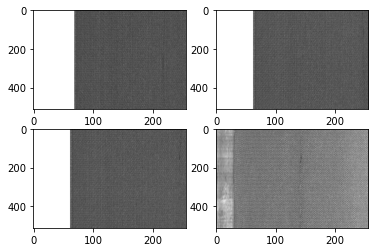

In [4]:
fig, ax = plt.subplots(2, 2)
k = 0
 
for i in range(2):
    for j in range(2):
        ax[i][j].imshow(train_images[k], aspect='auto')
        k += 1
 
plt.show()

In [5]:
image_train=train_images/255.0
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
label = encoder.fit_transform(train_labels)


print(label.shape)

(247, 1)


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_train, label, test_size = 0.20, random_state =42)

In [7]:
print("Shape of Train Features",x_train.shape)
print("Shape of Train Labels", y_train.shape)


print("Shape of Test Features",x_test.shape)
print("Shape of Test Labels",y_test.shape)

Shape of Train Features (197, 512, 256, 3)
Shape of Train Labels (197, 1)
Shape of Test Features (50, 512, 256, 3)
Shape of Test Labels (50, 1)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers import Activation, Dense

In [9]:
model = Sequential()

model.add(Conv2D(16,(3,3),padding='same',input_shape=(512,256,3)))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

num_classes=2
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 256, 16)      448       
                                                                 
 activation (Activation)     (None, 512, 256, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 510, 254, 16)      2320      
                                                                 
 activation_1 (Activation)   (None, 510, 254, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 127, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 255, 127, 16)      0         
                                                        

In [10]:
#Define Model with BatchNormalization and Dropout
# num_classes=2
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256,128, 3)))
# model.add(BatchNormalization())

# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# # model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# # model.add(Dropout(0.3))

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(BatchNormalization())
# # model.add(Dropout(0.5))

# model.add(Flatten())

# model.add(Dense(32))
# model.add(Dense(num_classes, activation='softmax'))
# model.summary()
# # compile model

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [17]:
batch_size=4
epochs=15

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/15
50/50 - 54s - loss: 0.4078 - acc: 0.8173 - val_loss: 0.5783 - val_acc: 0.6800 - 54s/epoch - 1s/step
Epoch 2/15
50/50 - 58s - loss: 0.3409 - acc: 0.8680 - val_loss: 0.6270 - val_acc: 0.7200 - 58s/epoch - 1s/step
Epoch 3/15
50/50 - 47s - loss: 0.3293 - acc: 0.8579 - val_loss: 0.6247 - val_acc: 0.7200 - 47s/epoch - 941ms/step
Epoch 4/15
50/50 - 48s - loss: 0.3608 - acc: 0.8274 - val_loss: 0.6313 - val_acc: 0.8200 - 48s/epoch - 960ms/step
Epoch 5/15
50/50 - 48s - loss: 0.3261 - acc: 0.8376 - val_loss: 0.5657 - val_acc: 0.8200 - 48s/epoch - 961ms/step
Epoch 6/15
50/50 - 55s - loss: 0.2536 - acc: 0.9036 - val_loss: 0.6282 - val_acc: 0.8000 - 55s/epoch - 1s/step
Epoch 7/15
50/50 - 49s - loss: 0.3102 - acc: 0.8680 - val_loss: 0.5781 - val_acc: 0.8200 - 49s/epoch - 988ms/step
Epoch 8/15
50/50 - 49s - loss: 0.2411 - acc: 0.9289 - val_loss: 0.6346 - val_acc: 0.7800 - 49s/epoch - 979ms/step
Epoch 9/15
50/50 - 42s - loss: 0.2349 - acc: 0.9289 - val_loss: 0.5947 - val_acc: 0.8400 - 42s/ep

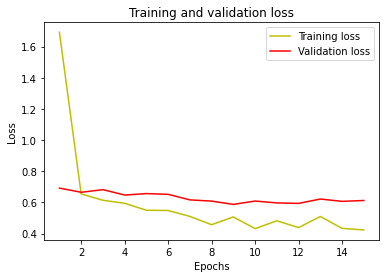

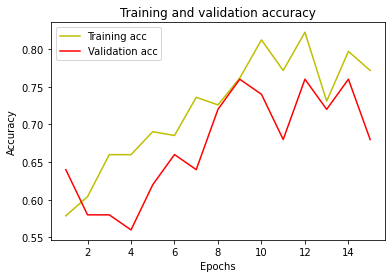

In [13]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
#  Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

#Print confusion matrix


2/2 [==============================] - 4s 899ms/step


<AxesSubplot:>

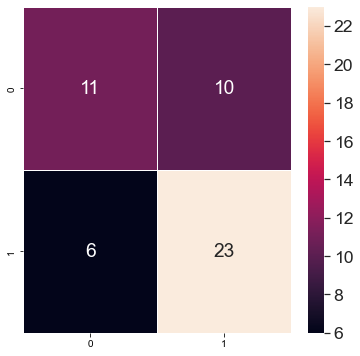

In [15]:
#Print confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

In [16]:
model.save('epic_num_reader.mode')

INFO:tensorflow:Assets written to: epic_num_reader.mode\assets


INFO:tensorflow:Assets written to: epic_num_reader.mode\assets
